In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Titanic dataset
data = pd.read_csv('titanic.csv')  # Ensure the file path is correct

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

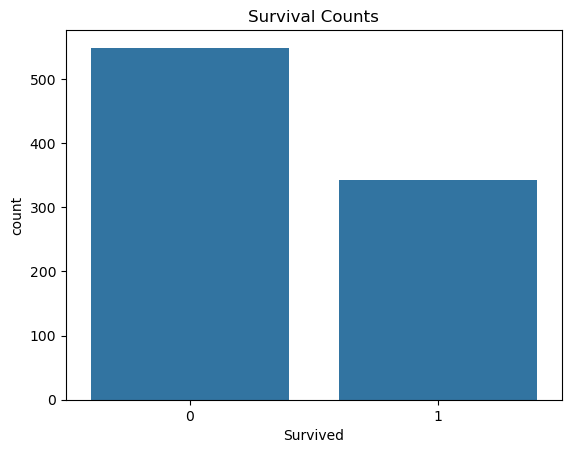

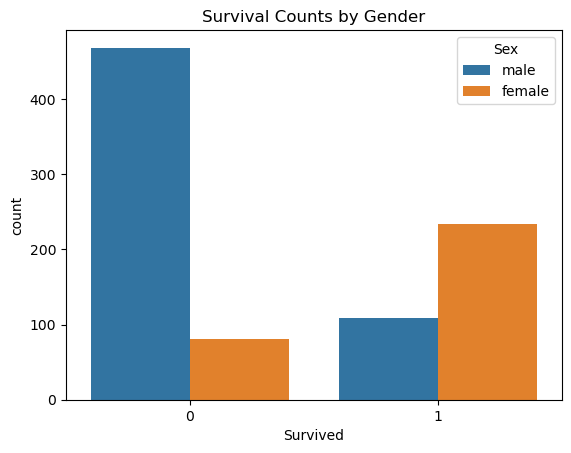

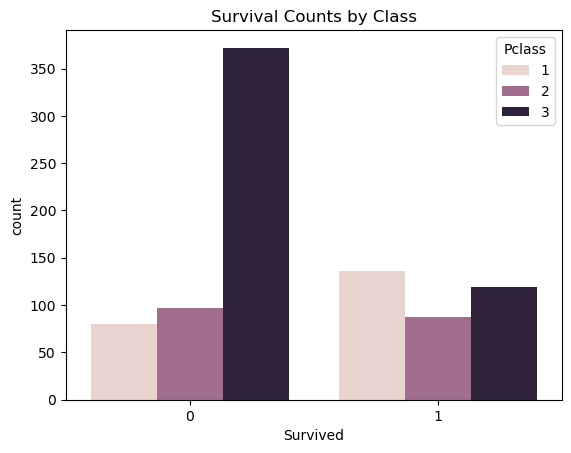

In [4]:
# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Visualize the survival rate
sns.countplot(x='Survived', data=data)
plt.title("Survival Counts")
plt.show()

# Visualize survival by gender
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title("Survival Counts by Gender")
plt.show()

# Visualize survival by class
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title("Survival Counts by Class")
plt.show()

In [5]:
# Drop unnecessary columns
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values in 'Age' and 'Embarked'
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convert 'Sex' and 'Embarked' to numeric values
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# Define features and target variable
X = data.drop('Survived', axis=1)  # Explanatory variables
y = data['Survived']                # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\robiul\AppData\Local\Temp\ipykernel_16572\2898769882.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\robiul\AppData\Local\Temp\ipykernel_16572\2898769882.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [6]:
# Fit logistic regression model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_logistic = logistic_model.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[90 15]
 [19 55]]


In [7]:
# Fit SVM with RBF kernel
svm_model_rbf = SVC(kernel='rbf', class_weight='balanced')
svm_model_rbf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svm_rbf = svm_model_rbf.predict(X_test_scaled)
print("SVM with RBF Kernel Classification Report:")
print(classification_report(y_test, y_pred_svm_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_rbf))

SVM with RBF Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[88 17]
 [17 57]]


In [8]:
# Cross-validation for Logistic Regression
logistic_cv_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5)
print("Logistic Regression CV Accuracy:", logistic_cv_scores.mean())

# Cross-validation for SVM with RBF kernel
svm_cv_scores = cross_val_score(svm_model_rbf, X_train_scaled, y_train, cv=5)
print("SVM with RBF CV Accuracy:", svm_cv_scores.mean())

Logistic Regression CV Accuracy: 0.7920614596670934
SVM with RBF CV Accuracy: 0.8159755737220526


In [9]:
# Fit SVM with adjusted class weights
svm_model_weighted = SVC(kernel='rbf', class_weight={0: 1, 1: 2})  # Example of class weight adjustment
svm_model_weighted.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_weighted = svm_model_weighted.predict(X_test_scaled)
print("SVM with Weighted Classes Classification Report:")
print(classification_report(y_test, y_pred_weighted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))

SVM with Weighted Classes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[88 17]
 [17 57]]


In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit OVR (Logistic Regression)
ovr_model = OneVsRestClassifier(LogisticRegression(max_iter=200))
ovr_model.fit(X_train_scaled, y_train)
y_pred_ovr = ovr_model.predict(X_test_scaled)
ovr_accuracy = accuracy_score(y_test, y_pred_ovr)
print(f"OVR Logistic Regression Accuracy: {ovr_accuracy:.4f}")

# Fit OVO (SVM)
ovo_model = SVC(kernel='rbf')
ovo_model.fit(X_train_scaled, y_train)
y_pred_ovo = ovo_model.predict(X_test_scaled)
ovo_accuracy = accuracy_score(y_test, y_pred_ovo)
print(f"OVO SVM Accuracy: {ovo_accuracy:.4f}")

OVR Logistic Regression Accuracy: 0.8101
OVO SVM Accuracy: 0.8156
